In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn import ensemble

fashion = pd.read_csv('fashion-mnist_test.csv')

fashion

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
np.reshape()

In [ ]:
np.reshape(i, (28, 28))

In [2]:
fashion_arr = [np.reshape(i, (28, 28)) for i in fashion.drop('label', axis=1).to_numpy()]

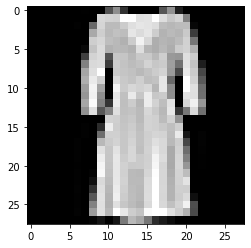

In [3]:
plt.imshow(fashion_arr[10], cmap='gray');

In [4]:
y = fashion['label']
X = fashion.drop('label', axis=1)

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
clr = ensemble.RandomForestClassifier(n_estimators=1000, random_state=1)

In [ ]:
clr.fit(X_train, y_train)

In [ ]:
prediction = clr.predict(X_test)

In [ ]:
evaluate = pd.DataFrame({
    'actual': y_test,
    'predicted': prediction
})

In [ ]:
sns.scatterplot(data=evaluate, x='actual', y='predicted', alpha=0.02)

In [ ]:
metrics.accuracy_score(evaluate['actual'], evaluate['predicted'])

In [ ]:
matrix = metrics.confusion_matrix(evaluate['actual'], evaluate['predicted'])
matrix

In [ ]:
accuracies = zip(range(0,10), matrix.diagonal()/matrix.sum(axis=1))
acc_df = pd.DataFrame([i for i in accuracies], columns=['label', 'accuracy'])

labels = acc_df['label']
values = acc_df['accuracy']

ax = sns.barplot(x=labels, y=values)

for p in ax.patches:
             ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

ax.set_title('Label 6 is the most inaccurate')
plt.show()